# Prediction Menchanism - Reaction Time

### Figure 8(a)

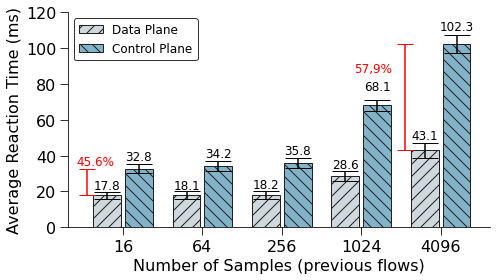

In [1]:
"""
========
Prediction Menchanism - Reaction Time
========

"""
import numpy as np
import matplotlib.pyplot as plt
import pylab as pyl

#from matplotlib import rc
#import pickle as p
#rc('font',**{'family':'serif','serif':['Times']})
#rc('font',**{'family':'serif','serif':['Helvetica']})
#rc('text', usetex=True)


ll = np.array([2,3,4,5,6])

N = 9
SIZE  =16

dataDP   = [17.843, 18.058, 18.222, 28.602, 43.068]     #Data plane
intervDP = [1.82, 1.99, 2.23, 2.65, 4.14]               #Confidence interval
dataCP   = [32.800, 34.201, 35.812, 68.105, 102.312]    #Control plane
intervCP = [2.42, 2.78, 2.96, 3.13, 5.14]               #Confidence interval

ind = np.arange(N)  # the x locations for the groups
width = 0.35        # the width of the bars
fig, ax = plt.subplots(figsize=(7, 4))

rects1 = ax.bar(ll-0.2, dataDP,width, color='#cfd8dc',  edgecolor='#212121', alpha=1, yerr=intervDP, hatch="//", capsize=13, label='Data Plane')

rects2 = ax.bar(ll+0.2, dataCP,width, color='#82b3c9', edgecolor='#212121', alpha=1, yerr=intervCP, linestyle='-', hatch="\\\\", capsize=13, label='Control Plane')

#Differences
##### LABEL 
ax.errorbar((1.55,),(((dataCP[0]-dataDP[0])/2)+dataDP[0],), yerr=((dataCP[0]-dataDP[0])/2), ecolor='red', linestyle='-.',  mew=1,capsize=8, label=None)
ax.text(1.65, (dataCP[0]),"45.6%",
                ha='center', va='bottom', color='red', fontsize=SIZE-4)

ax.errorbar((5.55,),(((dataCP[4]-dataDP[4])/2)+dataDP[4],), yerr=((dataCP[4]-dataDP[4])/2), ecolor='red', linestyle='-.',  mew=1,capsize=8, label=None)
ax.text(5.15, ((dataCP[4]-dataDP[4])/2)+dataDP[4]+12,"57,9%",
                ha='center', va='bottom', color='red', fontsize=SIZE-4)



plt.xticks(fontsize=SIZE)
plt.yticks(fontsize=SIZE)
ax.set_ylabel('Average Reaction Time (ms)' , fontsize=SIZE)
ax.set_xlabel('Number of Samples (previous flows)' , fontsize=SIZE)
ax.set_xticks(ll)
ax.set_xticklabels(( 16, 64, 256, 1024, 4096), fontsize=SIZE, rotation=0)

ax.legend(loc=2, prop={'size': SIZE-4}, edgecolor='black')

ax.set_ylim(ymin=0, ymax=120)
ax.tick_params(direction='out', length=8)
ax.tick_params( which='minor', direction='out', length=5)
ax.set_axisbelow(True)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.10*height if height < 100 else 1.06*height ,
                '%.1f' % float(height),
                ha='center', va='bottom', color='#000000', fontsize=SIZE-4)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()
fig.savefig("fig/reaction-time-prediction.pdf")

